In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('data/timeseries_data.csv', index_col=0)
data.shape

(32699, 25)

In [3]:
data.head()

,institution,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,...,year,month,day,dayofweek,lag_1,lag_2,lag_3,t1,t2,t3
date,,,,,,,,,,,,,,,,,,,,,
2021-01-07,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,14,clinic,14,0,14,0.0,39.642857,0.0,39.642857,...,2021,1,7,3,16.0,12.0,12.0,12.0,9.0,9.0
2021-01-08,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,12,clinic,12,0,12,0.0,36.750000,0.0,36.750000,...,2021,1,8,4,14.0,16.0,12.0,9.0,9.0,11.0
2021-01-09,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,9,clinic,9,0,9,0.0,41.777778,0.0,41.777778,...,2021,1,9,5,12.0,14.0,16.0,9.0,11.0,17.0
2021-01-10,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,9,clinic,9,0,9,0.0,41.777778,0.0,41.777778,...,2021,1,10,6,9.0,12.0,14.0,11.0,17.0,10.0
2021-01-11,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,11,clinic,11,0,11,0.0,39.818182,0.0,39.818182,...,2021,1,11,0,9.0,9.0,12.0,17.0,10.0,14.0


In [4]:
data.columns

Index(['institution', 'visit_count', 'inst_type', 'no_unique_patients',
       'no_out_patients', 'no_in_patients', 'in_out_ratio', 'avg_age',
       'avg_male_age', 'avg_female_age', 'max_age', 'min_age', 'no_male',
       'no_female', 'no_unique_states', 'year', 'month', 'day', 'dayofweek',
       'lag_1', 'lag_2', 'lag_3', 't1', 't2', 't3'],
      dtype='object')

In [5]:
cat_cols = ['institution', 'inst_type', 'month','dayofweek']
num_cols = ['visit_count', 'no_unique_patients', 'no_out_patients',
       'no_in_patients', 'in_out_ratio', 'avg_age', 'avg_male_age', 'avg_female_age',
        'max_age', 'min_age', 'no_male', 'no_female',
       'no_unique_states', 'day', 'lag_1', 'lag_2', 'lag_3',]

In [6]:
data.drop('year', axis=1, inplace=True)

In [7]:
data.head()

,institution,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,...,no_unique_states,month,day,dayofweek,lag_1,lag_2,lag_3,t1,t2,t3
date,,,,,,,,,,,,,,,,,,,,,
2021-01-07,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,14,clinic,14,0,14,0.0,39.642857,0.0,39.642857,...,3,1,7,3,16.0,12.0,12.0,12.0,9.0,9.0
2021-01-08,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,12,clinic,12,0,12,0.0,36.750000,0.0,36.750000,...,5,1,8,4,14.0,16.0,12.0,9.0,9.0,11.0
2021-01-09,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,9,clinic,9,0,9,0.0,41.777778,0.0,41.777778,...,4,1,9,5,12.0,14.0,16.0,9.0,11.0,17.0
2021-01-10,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,9,clinic,9,0,9,0.0,41.777778,0.0,41.777778,...,4,1,10,6,9.0,12.0,14.0,11.0,17.0,10.0
2021-01-11,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,11,clinic,11,0,11,0.0,39.818182,0.0,39.818182,...,4,1,11,0,9.0,9.0,12.0,17.0,10.0,14.0


In [8]:
data.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
# data['split'] = ''
# data.split[data.month<=7] = 'train'
# data.split[data.month.isin([8,9])] = 'val'
# data.split[data.month.isin([10,11])] = 'test'

In [10]:
data.head()

,institution,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,...,no_unique_states,month,day,dayofweek,lag_1,lag_2,lag_3,t1,t2,t3
date,,,,,,,,,,,,,,,,,,,,,
2021-01-07,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,14,clinic,14,0,14,0.0,39.642857,0.0,39.642857,...,3,1,7,3,16.0,12.0,12.0,12.0,9.0,9.0
2021-01-08,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,12,clinic,12,0,12,0.0,36.750000,0.0,36.750000,...,5,1,8,4,14.0,16.0,12.0,9.0,9.0,11.0
2021-01-09,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,9,clinic,9,0,9,0.0,41.777778,0.0,41.777778,...,4,1,9,5,12.0,14.0,16.0,9.0,11.0,17.0
2021-01-10,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,9,clinic,9,0,9,0.0,41.777778,0.0,41.777778,...,4,1,10,6,9.0,12.0,14.0,11.0,17.0,10.0
2021-01-11,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,11,clinic,11,0,11,0.0,39.818182,0.0,39.818182,...,4,1,11,0,9.0,9.0,12.0,17.0,10.0,14.0


In [11]:
# data.split.value_counts()

In [12]:
# data.institution[data.split=='train'].nunique()

In [13]:
data.institution.nunique()

130

In [14]:
train, test = train_test_split(data, train_size=.7, stratify=data['institution'])

In [15]:
train.shape, test.shape

((22889, 24), (9810, 24))

In [16]:
train['institution'].nunique(), test['institution'].nunique()

(130, 130)

In [17]:
train.head()

,institution,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,...,no_unique_states,month,day,dayofweek,lag_1,lag_2,lag_3,t1,t2,t3
date,,,,,,,,,,,,,,,,,,,,,
2021-05-17,4850e9c9-2945-4087-b4f9-6c302e44b84e,8,hospital,8,0,8,0.0,28.500000,25.333333,30.4,...,1,5,17,0,2.0,5.0,5.0,13.0,8.0,9.0
2021-07-26,8295dc03-9ec7-4f44-9bab-b1ea94e2eef4,9,hospital,9,0,9,0.0,4.555556,5.500000,3.8,...,3,7,26,0,7.0,5.0,10.0,12.0,4.0,6.0
2021-01-27,9e1484a3-0235-48c5-aeed-c44451c918fa,29,hospital,29,0,29,0.0,49.827586,52.450000,44.0,...,1,1,27,2,24.0,23.0,25.0,27.0,24.0,16.0
2021-02-16,1a75706d-889a-48ab-a6c7-1fbbd70aeda8,3,hospital,3,0,3,0.0,68.666667,63.000000,71.5,...,2,2,16,1,2.0,4.0,4.0,4.0,2.0,5.0
2021-07-31,19ae8e3b-075d-4caa-bdb7-535a971e6505,2,hospital,2,0,2,0.0,75.000000,75.000000,0.0,...,2,7,31,5,9.0,20.0,12.0,2.0,38.0,18.0


In [18]:
X_train = train[cat_cols+num_cols]
y_train = train['t1']

X_test = test[cat_cols+num_cols]
y_test = test['t1']

In [19]:
X_train.shape, X_test.shape

((22889, 21), (9810, 21))

In [20]:
X_train.head()

,institution,inst_type,month,dayofweek,visit_count,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,...,avg_female_age,max_age,min_age,no_male,no_female,no_unique_states,day,lag_1,lag_2,lag_3
date,,,,,,,,,,,,,,,,,,,,,
2021-05-17,4850e9c9-2945-4087-b4f9-6c302e44b84e,hospital,5,0,8,8,0,8,0.0,28.500000,...,30.4,44.0,5.0,3,5,1,17,2.0,5.0,5.0
2021-07-26,8295dc03-9ec7-4f44-9bab-b1ea94e2eef4,hospital,7,0,9,9,0,9,0.0,4.555556,...,3.8,8.0,3.0,4,5,3,26,7.0,5.0,10.0
2021-01-27,9e1484a3-0235-48c5-aeed-c44451c918fa,hospital,1,2,29,29,0,29,0.0,49.827586,...,44.0,84.0,11.0,20,9,1,27,24.0,23.0,25.0
2021-02-16,1a75706d-889a-48ab-a6c7-1fbbd70aeda8,hospital,2,1,3,3,0,3,0.0,68.666667,...,71.5,95.0,48.0,1,2,2,16,2.0,4.0,4.0
2021-07-31,19ae8e3b-075d-4caa-bdb7-535a971e6505,hospital,7,5,2,2,0,2,0.0,75.000000,...,0.0,76.0,74.0,2,0,2,31,9.0,20.0,12.0


In [21]:
data[data.isna().any(axis=1)]

,institution,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,...,no_unique_states,month,day,dayofweek,lag_1,lag_2,lag_3,t1,t2,t3
date,,,,,,,,,,,,,,,,,,,,,


#### Regression

In [22]:
models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge(), RandomForestRegressor(max_depth=10)] 

In [29]:
for model in models:
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(), cat_cols),
            ('num', StandardScaler(), num_cols)
        ]
    )
    print(model)

    model_pipe = Pipeline(
        steps=[("preprocessor", preprocessor), ("regressor", model)]
    )

    model_pipe.fit(X_train, np.log(y_train.values))

    train_preds = model_pipe.predict(X_train)
    train_preds = np.exp(train_preds).astype(int)
    print('Training MAE : ', mean_absolute_error(y_train.values, train_preds))
    print('Training MSE : ', mean_squared_error(y_train.values, train_preds))
    print('Training RMSE : ', np.sqrt(mean_squared_error(y_train.values, train_preds)))
  
    val_preds = model_pipe.predict(X_test) 
    val_preds = np.exp(val_preds).astype(int)
    print('Validation MAE : ', mean_absolute_error(y_test.values, val_preds)) 
    print('Validation MSE : ', mean_squared_error(y_test.values, val_preds))
    print('Validation RMSE : ', np.sqrt(mean_squared_error(y_test.values, val_preds)))
    print() 

LinearRegression()
Training MAE :  14.367119577089431
Training MSE :  177366.24968325396
Training RMSE :  421.1487263227255
Validation MAE :  12.53078491335372
Validation MSE :  27057.054128440366
Validation RMSE :  164.49028581785723

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training MAE :  3

#### Hyper paraeter tuning

In [30]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

##### XGBoost

In [31]:
space={
    'max_depth': hp.quniform("max_depth", 3, 18, 1),
    'gamma': hp.uniform ('gamma', 1,9),
    'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
    'reg_lambda' : hp.uniform('reg_lambda', 0,1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': hp.uniform ('n_estimators', 10,180),
    'seed': 0
}

In [36]:
def objective(space):
    clf=XGBRegressor(
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']), eval_metric="rmse", early_stopping_rounds=10)
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), cat_cols),
            ('num', StandardScaler(), num_cols)
        ]
    )

    train_processed = preprocessor.fit_transform(X_train)
    test_processed = preprocessor.fit_transform(X_test)

    y_train_ = np.log(y_train.values)
    y_test_ = np.log(y_test.values)

    evaluation = [(train_processed, y_train_), (test_processed, y_test_)]
    
    clf.fit(train_processed, y_train_,
            eval_set=evaluation,verbose=False)
    
    pred = clf.predict(test_processed)
    pred = np.exp(pred).astype(int)
    print('Validation MAE : ', mean_absolute_error(y_test, pred)) 
    print('Validation MSE : ', mean_squared_error(y_test, pred)) 
    return {'loss': mean_absolute_error(y_test_, pred), 'status': STATUS_OK }

In [37]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 200,
                        trials = trials)

Validation MAE :                                                           
11.158919469928644                                                         
Validation MSE :                                                           
478.92405708460757                                                         
Validation MAE :                                                           
7.1341488277268095                                                         
Validation MSE :                                                           
269.9677879714577                                                          
Validation MAE :                                                           
11.17441386340469                                                          
Validation MSE :                                                           
480.1318042813456                                                          
Validation MAE :                                                           
8.6691131498

In [38]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5912654508588662, 'gamma': 7.890252865596843, 'max_depth': 12.0, 'min_child_weight': 2.0, 'n_estimators': 49.05548813493889, 'reg_alpha': 175.0, 'reg_lambda': 0.36669569885813513}


Build XGBoost Model

In [39]:
# best_hyperparams['objective'] = 'reg:squarederror'
# del best_hyperparams['objective']
best_hyperparams

{'colsample_bytree': 0.5912654508588662,
 'gamma': 7.890252865596843,
 'max_depth': 12.0,
 'min_child_weight': 2.0,
 'n_estimators': 49.05548813493889,
 'reg_alpha': 175.0,
 'reg_lambda': 0.36669569885813513}

#### Main Model

In [40]:
%%time
main_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

params = {'colsample_bytree': 0.5912654508588662,
 'gamma': 7.890252865596843,
 'max_depth': 12,
 'min_child_weight': 2.0,
 'n_estimators': 49,
 'reg_alpha': 175.0,
 'reg_lambda': 0.36669569885813513}

main_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", XGBRegressor(**params))]
)

main_pipe.fit(X_train, np.log(y_train.values))

CPU times: user 86.5 ms, sys: 39.2 ms, total: 126 ms
Wall time: 106 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['institution', 'inst_type',
                                                   'month', 'dayofweek']),
                                                 ('num', StandardScaler(),
                                                  ['visit_count',
                                                   'no_unique_patients',
                                                   'no_out_patients',
                                                   'no_in_patients',
                                                   'in_out_ratio', 'avg_age',
                                                   'avg_male_age',
                                                   'avg_female_age', 'max_age',
                                                   'min_age', 'no_male',
                                                   'no_female',
                                                   'no_unique_states',...
                              feature_types=None, gamma=7.890252865596843,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=2.0, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=49, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [41]:
import joblib

joblib.dump(main_pipe, 'models/xgboost_t1_pipeline.sav')

['models/xgboost_t1_pipeline.sav']

In [42]:
test.head()

,institution,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,...,no_unique_states,month,day,dayofweek,lag_1,lag_2,lag_3,t1,t2,t3
date,,,,,,,,,,,,,,,,,,,,,
2021-06-04,a471dd7c-e2dd-4cc1-a77c-2450d45b9bff,2,hospital,2,0,2,0.0,46.500000,44.000000,49.000000,...,2,6,4,4,5.0,3.0,8.0,1.0,1.0,1.0
2021-06-09,2fa0d571-e424-4ee7-ac8b-deb7792305a7,49,hospital,47,5,44,8.8,34.489796,32.647059,35.468750,...,13,6,9,2,41.0,70.0,22.0,32.0,34.0,17.0
2021-09-17,92fd8fe5-2f7b-4900-a902-0f5afaacd0f0,12,hospital,11,2,10,5.0,37.166667,36.428571,38.200000,...,2,9,17,4,33.0,11.0,30.0,18.0,23.0,25.0
2021-08-22,c2dc34b5-7a9b-4dcb-85ae-b3b6c23d823e,2,hospital,2,0,2,0.0,64.000000,67.000000,61.000000,...,2,8,22,6,14.0,41.0,28.0,31.0,27.0,22.0
2021-10-05,4531a46a-a197-4f87-a56a-5013e21efbcb,4,clinic,4,0,4,0.0,25.000000,9.000000,30.333333,...,2,10,5,1,3.0,1.0,1.0,5.0,3.0,1.0


In [43]:
test.to_csv('data/testing_data.csv')

In [44]:
np.log(y_train.values)

array([2.56494936, 2.48490665, 3.29583687, ..., 1.38629436, 1.60943791,
       2.19722458])

In [45]:
test.institution.unique()

array(['a471dd7c-e2dd-4cc1-a77c-2450d45b9bff',
       '2fa0d571-e424-4ee7-ac8b-deb7792305a7',
       '92fd8fe5-2f7b-4900-a902-0f5afaacd0f0',
       'c2dc34b5-7a9b-4dcb-85ae-b3b6c23d823e',
       '4531a46a-a197-4f87-a56a-5013e21efbcb',
       'e3115277-d57b-492c-bf7a-1c432ecb473b',
       '9e1484a3-0235-48c5-aeed-c44451c918fa',
       '7b71b487-8a7a-48ad-a817-0eb5b692bfe2',
       '43215a1a-2794-4ea9-bebd-4c09a2618e6c',
       'f7427dbb-e87d-4ed2-b168-136c244596b2',
       '26d4a16f-7684-413c-83d6-0efeb5f02cea',
       'e2adc287-86ec-4341-b43d-13cb91255662',
       '9367d62f-6b99-46f8-8505-719e829ad667',
       '54a4df3e-b280-4c89-9a72-aad7f18b761b',
       '01811bcf-ec5b-4a02-a64a-0ac551f9d0ac',
       '18cb6e95-6073-4102-989e-1b133ac99b29',
       'b990dbc3-0d35-4524-8c93-5a5e19bcd82d',
       'bdd4965b-3cb0-443a-b8de-37c86e621d6c',
       '8eb8a734-4ce2-4130-b334-0ba8c680cd33',
       '5f3543c7-99d3-4544-9a70-8788be90fce5',
       '19ae2f00-60e7-4db1-8719-644820cc04df',
       '4a94b

In [46]:
test[test.index=='2021-07-18'].institution.unique().shape[0] * 5

150

In [47]:
data.t1.mean()

14.307226520688706

## Model Explanation and Interpretation

In [48]:
import shap

In [49]:
col_names = [col for col in X_train.columns if col in cat_cols+num_cols]
col_names

['institution',
 'inst_type',
 'month',
 'dayofweek',
 'visit_count',
 'no_unique_patients',
 'no_out_patients',
 'no_in_patients',
 'in_out_ratio',
 'avg_age',
 'avg_male_age',
 'avg_female_age',
 'max_age',
 'min_age',
 'no_male',
 'no_female',
 'no_unique_states',
 'day',
 'lag_1',
 'lag_2',
 'lag_3']

In [50]:
def predict_fn(sample, feature_names=col_names):
    data_asframe = pd.DataFrame(sample, columns=feature_names)
    return main_pipe.predict(data_asframe)

In [51]:
explainer = shap.KernelExplainer(predict_fn, shap.sample(X_train, 500))
X = shap.sample(X_test, 100)
shap_values = explainer(X)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

We can see below that the primary factor for demand forecast according to the model is the `visit count`. The next most powerful indicator of demand is the `last 3 days demand`.

This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in demand.

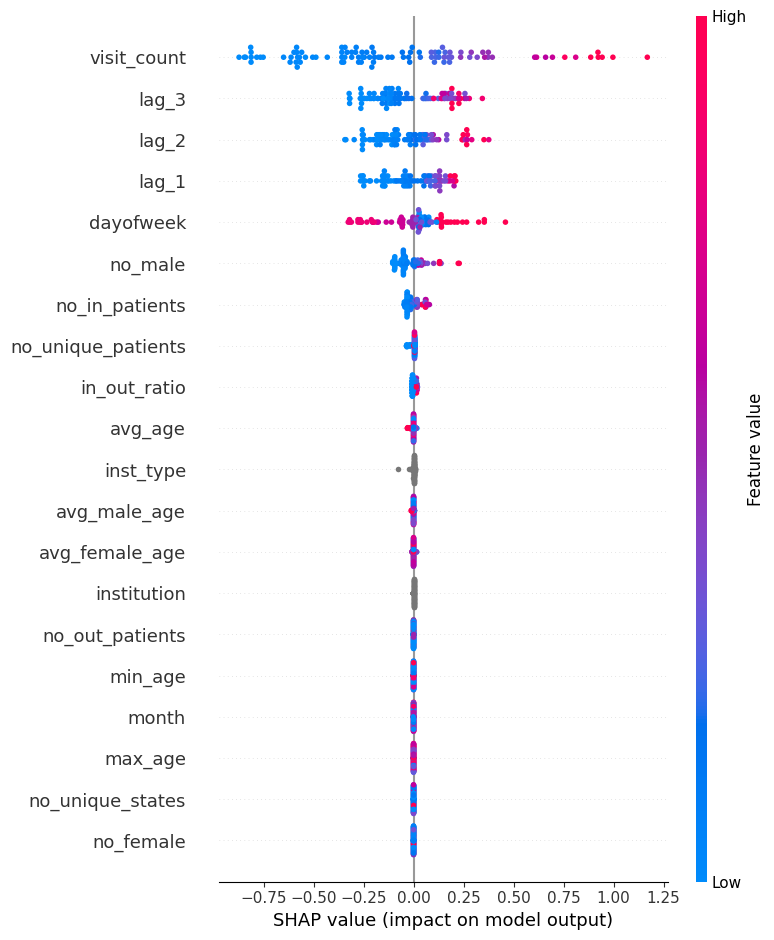

In [52]:
shap.summary_plot(shap_values, X)

The SHAP dependence plot for some of the features.

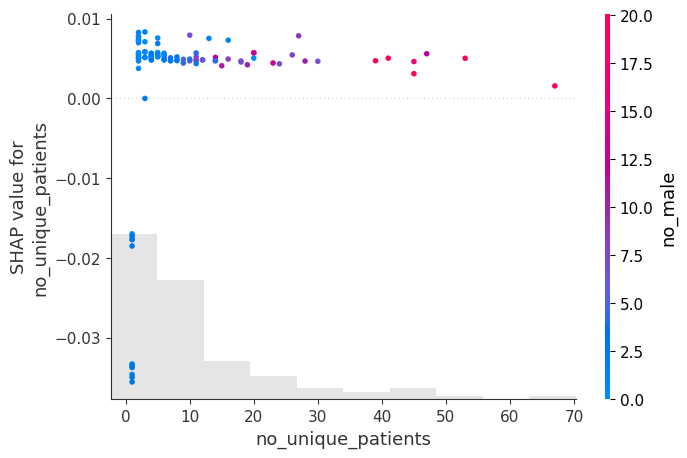

In [53]:
shap.plots.scatter(shap_values[:, "no_unique_patients"], color=shap_values)

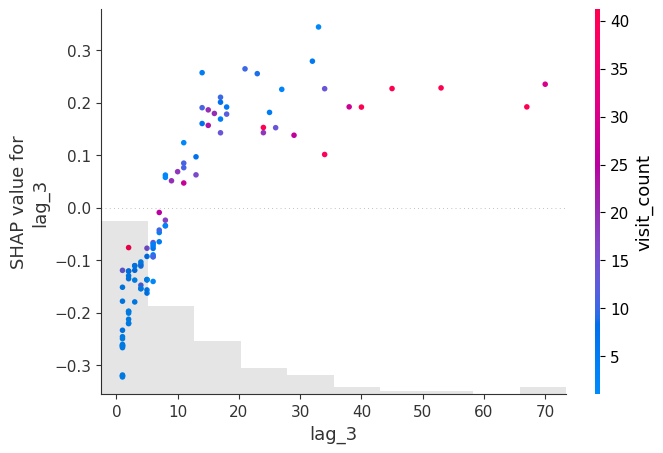

In [54]:
shap.plots.scatter(shap_values[:, "lag_3"], color=shap_values)

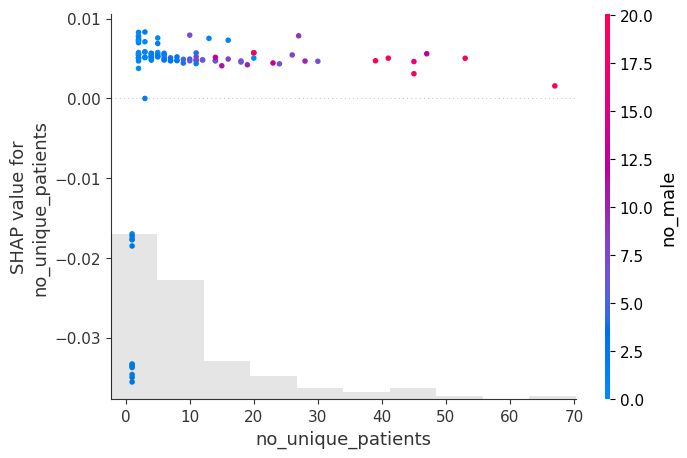

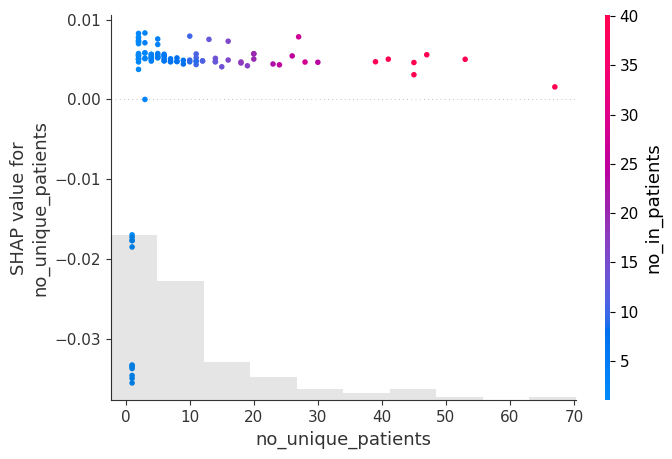

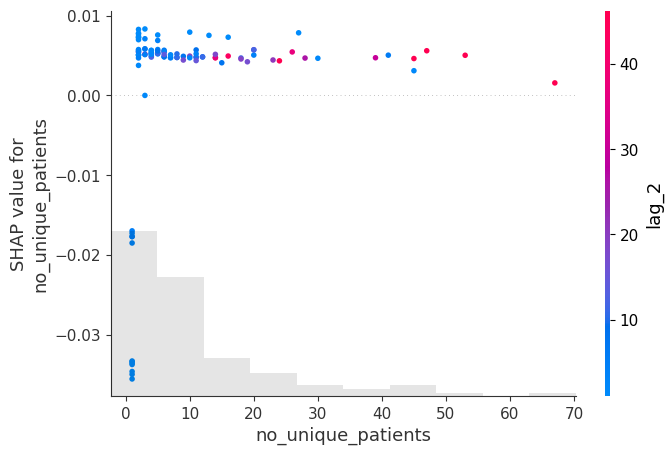

In [55]:
inds = shap.utils.potential_interactions(shap_values[:, "no_unique_patients"], shap_values)

for i in range(3):
    shap.plots.scatter(shap_values[:, "no_unique_patients"], color=shap_values[:, inds[i]])

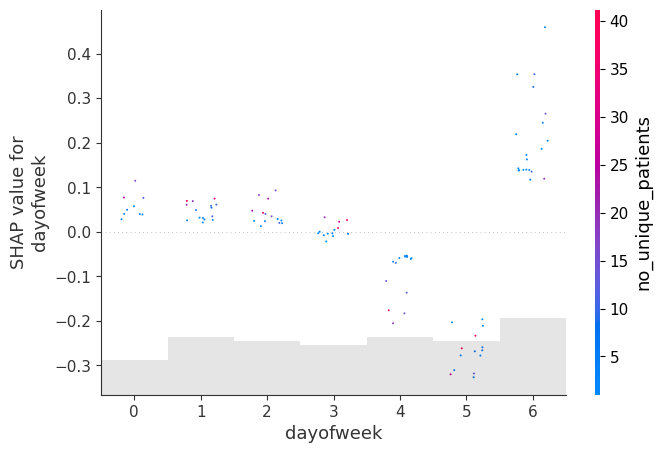

In [56]:
shap.plots.scatter(
    shap_values[:, "dayofweek"], dot_size=2, x_jitter=0.5, color=shap_values
)

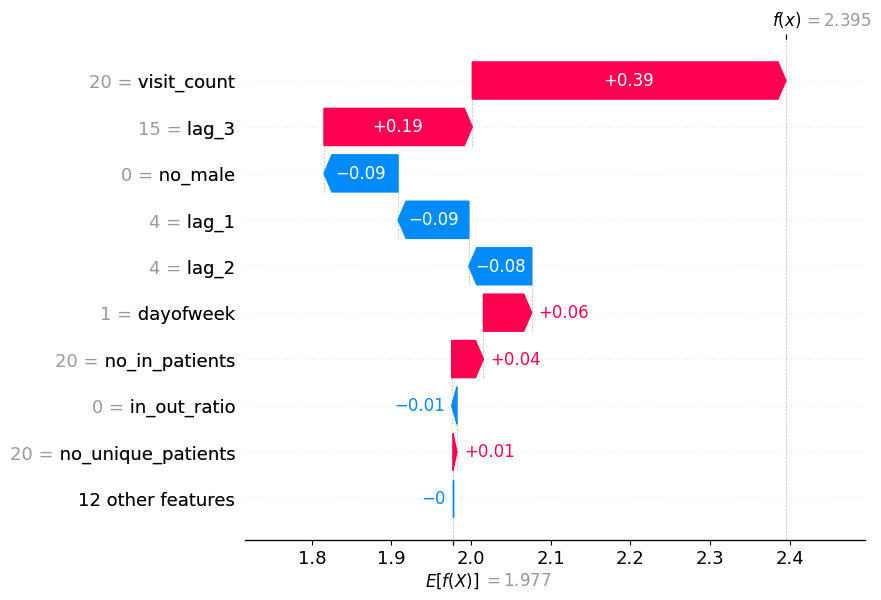

In [57]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])